# ExtractorBaseClass

This is the base class for an extractor. Each quantization algorithm will be implemented as subclass of this class.

In [1]:
from abc import ABC, abstractmethod

import margo_loader 
from utils.Formatting import flattish
from Palette import Palette

In [2]:
class ExtractorBaseClass(ABC):
    
    def __init__(self, img, n=20):
        self.img = img
        self.n = n
        self.__extracted = None
        self.palette = Palette()

    def get_color_map(self):
        if self.__extracted is None:
            self.__extracted = self.quantize()
        return self.__extracted
    
    def populate_palette(self):
        if self.palette.is_empty():
            for color in flattish(self.get_color_map()):
                if len(color) == 4:
                    r, g, b, a = color
                elif len(color) == 3:
                    r, g, b = color
                    a = 255
                self.palette.add_color(r, g, b, a)
        return self.palette
    
    def get_palette(self):
        if self.palette.is_empty():
            self.populate_palette()
        return self.palette
        
    @abstractmethod
    def quantize(self, img, n=20):
        raise Exception("Not implemented")
    

# Demo

The DoNothingExtractor implements a basic Extractor that does not modify the image in any way. We can see that the palette generated using the get_palette() method is very long because there is a large number of colors used in this image.

In [3]:
# :: ignore-cell ::
class DoNothingExtractor(ExtractorBaseClass):
    
    def quantize(self):
        return self.img

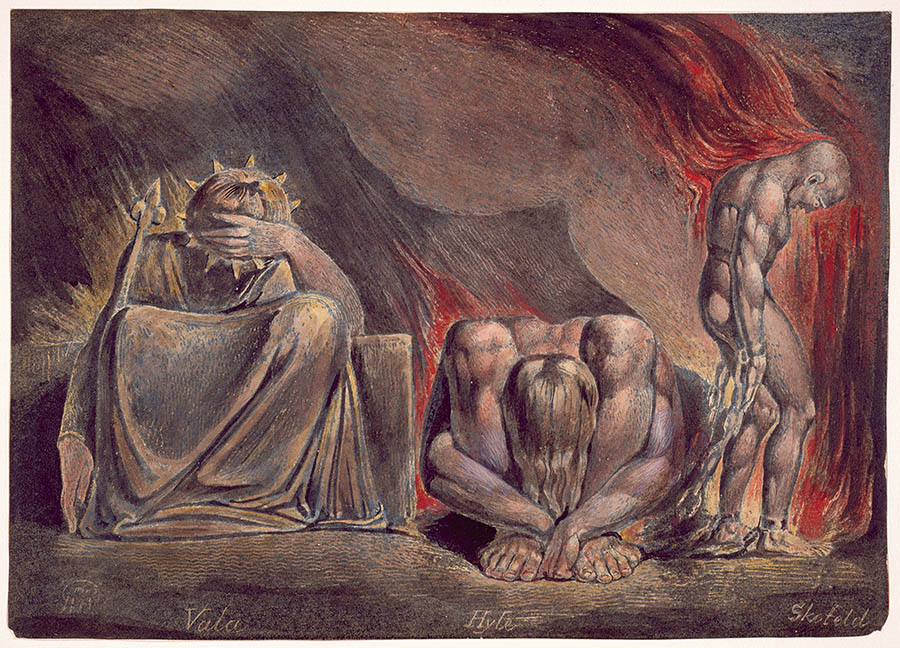

In [4]:
# :: ignore-cell ::
from utils import nbloader
from utils.ImageFiles import read_img
from PIL import Image
ebc = DoNothingExtractor(read_img("../images/jerusalem.mpi.p22-51.100.jpg"))

Image.fromarray(ebc.get_color_map())

In [5]:
# :: ignore-cell ::

ebc.get_palette().to_dict()

{'rgb(247,236,230)': 420,
 'rgb(242,231,225)': 8,
 'rgb(243,232,226)': 12,
 'rgb(244,233,227)': 31,
 'rgb(249,238,232)': 818,
 'rgb(245,234,228)': 60,
 'rgb(250,239,235)': 240,
 'rgb(248,237,233)': 125,
 'rgb(246,235,231)': 11,
 'rgb(247,236,232)': 155,
 'rgb(249,238,234)': 261,
 'rgb(251,240,236)': 133,
 'rgb(249,242,236)': 231,
 'rgb(248,241,235)': 144,
 'rgb(250,243,235)': 1187,
 'rgb(249,242,234)': 825,
 'rgb(248,241,233)': 352,
 'rgb(247,240,232)': 183,
 'rgb(246,239,231)': 69,
 'rgb(247,240,234)': 164,
 'rgb(250,243,237)': 155,
 'rgb(251,244,238)': 198,
 'rgb(252,245,239)': 140,
 'rgb(251,241,229)': 8,
 'rgb(249,239,227)': 5,
 'rgb(247,237,225)': 3,
 'rgb(245,235,223)': 2,
 'rgb(252,237,230)': 10,
 'rgb(249,242,232)': 41,
 'rgb(255,245,236)': 27,
 'rgb(251,244,236)': 1314,
 'rgb(245,238,230)': 40,
 'rgb(252,245,237)': 1629,
 'rgb(253,246,238)': 1763,
 'rgb(254,247,239)': 636,
 'rgb(255,248,240)': 225,
 'rgb(255,249,241)': 131,
 'rgb(254,250,241)': 168,
 'rgb(253,249,240)': 426,
 